### Loading the libraries and the dataset

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("../data/train.csv")


### Splitting to train and test

In [8]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Scaling

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Building the model

I decided to apply the elbow method, to determine the most optimal K for the KNN algorithm

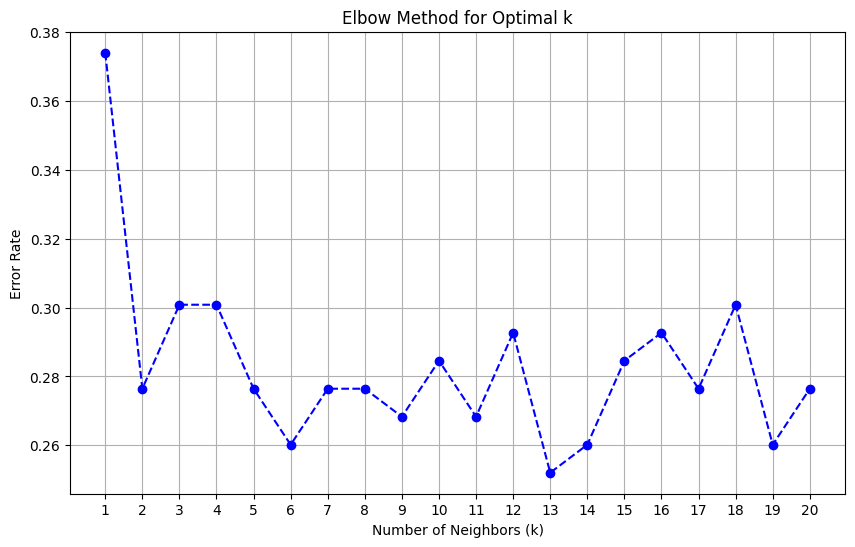

In [10]:
error_rates = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

plt.figure(figsize=(10,6))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Taking 6 for the K makes sense, because we need to keep the K value as low as possible to make our model as simple as possible, but also keep the error rate as low as possible. The next lowest error rate after k=6 is k=13 which is a big number and will complicate the model.

### Training and evaluating the model

In [11]:
optimal_k = 6

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7398373983739838

Confusion Matrix:
 [[76  5]
 [27 15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.94      0.83        81
           1       0.75      0.36      0.48        42

    accuracy                           0.74       123
   macro avg       0.74      0.65      0.65       123
weighted avg       0.74      0.74      0.71       123



In [12]:
import joblib

joblib.dump(knn, 'knn_model.pkl')

['knn_model.pkl']